In [1]:
import tensorflow as tf #library mechine-learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt #untuk visualisasi data
%matplotlib inline

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


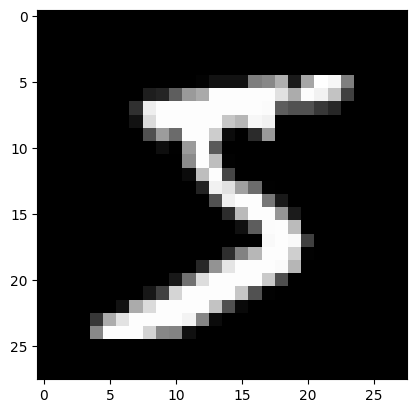

Pola digit angka 5


In [ ]:
plt.imshow(x_train[0], cmap="gray")
plt.show()
print("Pola digit angka",y_train[0])

In [ ]:
# konversi integers jadi floats
x_train= x_train.reshape(x_train.shape[0], 28, 28, 1)
train_norm = x_train.astype('float32')
x_test= x_test.reshape(x_test.shape[0], 28, 28, 1)
test_norm = x_test.astype('float32')
# normalisasi ke range 0-1
x_train = train_norm / 255.0
x_test = test_norm / 255.0
# one hot encode nilai target
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

history = model.fit(x=x_train, y=y_train_enc, epochs=20, callbacks=[es], validation_data=(x_test, y_test_enc))

In [ ]:
model = Sequential()

model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(strides=2))

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(strides=2))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=84, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=10, activation = 'softmax'))

model.summary() #menampilkan struktur model

model.compile(optimizer='adam', loss="categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(monitor='val_loss', mode='min', patience=5)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 6)           │              60 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 16)          │             880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 84)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 60,074 (234.66 KB)

 Trainable params: 60,074 (234.66 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 2. Evaluate the model
test_loss, test_acc = model.evaluate(x=x_test, y=y_test_enc)
print('\nAkurasi testing:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9868 - loss: 0.0435

Akurasi testing: 0.9897000193595886


In [ ]:
# Jalankan prediksi terlebih dahulu
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


In [ ]:
history = model.fit(x=x_train, y=y_train_enc, epochs=20, validation_data=(x_test, y_test_enc)) # Hapus callbacks=[es]

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9956 - loss: 0.0141 - val_accuracy: 0.9899 - val_loss: 0.0468
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9951 - loss: 0.0150 - val_accuracy: 0.9898 - val_loss: 0.0460
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - accuracy: 0.9959 - loss: 0.0145 - val_accuracy: 0.9890 - val_loss: 0.0486
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9963 - loss: 0.0125 - val_accuracy: 0.9890 - val_loss: 0.0504
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 13ms/step - accuracy: 0.9965 - loss: 0.0111 - val_accuracy: 0.9889 - val_loss: 0.0562
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9964 - loss: 0.0119 - val_accuracy: 0.9901 - val_loss: 0.0436
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 26s 14ms/step - accuracy: 0.9964 - loss: 0.0112 - val_accuracy: 0.9887 - val_loss: 0.0518
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 12ms/step - accuracy: 0.9962 -

In [ ]:
test_loss, test_acc = model.evaluate(x=x_test, y=y_test_enc)

# Tampilkan akurasi model
print('\nAkurasi testing:', test_acc)

# Tampilkan nilai loss
print('\nLoss testing:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9864 - loss: 0.0705

Akurasi testing: 0.9890000224113464

Loss testing: 0.05887122079730034


In [ ]:
predictions = model.predict(x_test)

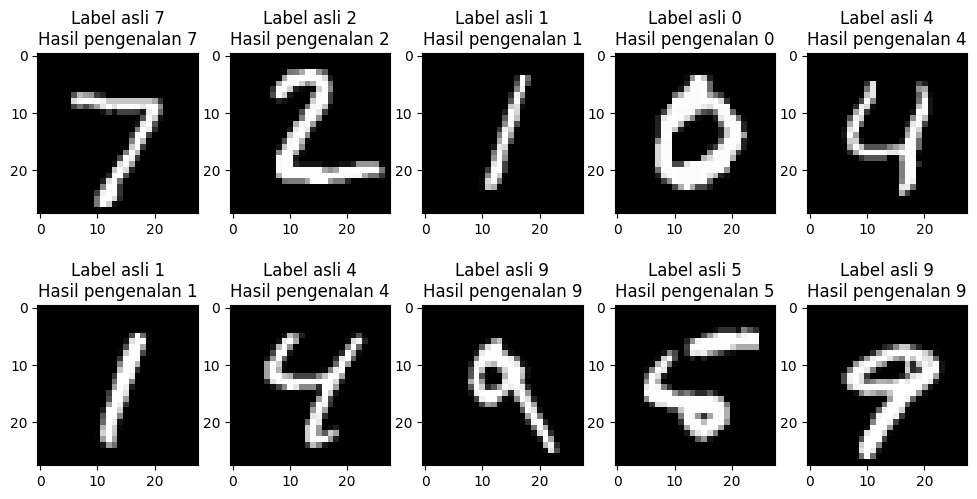

In [ ]:
# 4. Visualize the results
x_test__ = x_test.reshape(x_test.shape[0], 28, 28)
fig, axis = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test__[i], cmap='gray')
    ax.set(title = f"Label asli {y_test[i]}\nHasil pengenalan {predictions[i].argmax()}")

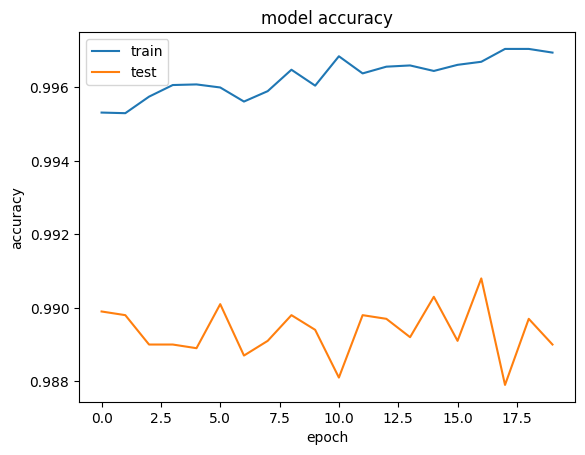

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

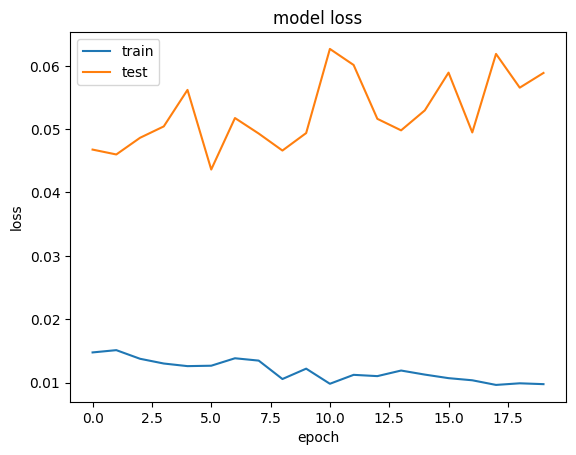

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()